# Case Study: Risk and Return Method - The Sharpe Ratio

This financial analysis case study is aiming at implemented the Sharpe Ratio to figure out two of the big tech companies-Amazon and Meta whose stock price could provide higher amount of return under the same unit of risk.

In [7]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [8]:
# Loading data
meta = pd.read_csv('meta.csv', parse_dates=['Date'])[['Date','Close/Last']]
meta.columns = ['Date','Meta']
meta['Meta'] = [str(i).strip('$,') for i in meta['Meta']]

amazon = pd.read_csv('amazon.csv', parse_dates=['Date'])[['Date','Close/Last']]
amazon.columns = ['Date','Amazon']
amazon['Amazon'] = [str(i).strip('$,') for i in amazon['Amazon']]

tesla = pd.read_csv('tesla.csv', parse_dates=['Date'])[['Date','Close/Last']]
tesla.columns = ['Date','Tesla']
tesla['Tesla'] = [str(i).strip('$,') for i in tesla['Tesla']]

sp500 = pd.read_csv('S&P.csv',parse_dates=['Date'])[['Date','Close']]
sp500.columns = ['Date', 'S&P 500']
sp500['S&P 500'] = [float(str(i).replace(',','')) for i in sp500['S&P 500']]

# Merging Amazon,Meta and Tesla stock price data
stock_data = pd.merge(pd.merge(amazon, meta, on = ['Date']), tesla, on=['Date'])
benchmark_data = sp500

# Changing data type and setting index
stock_data = stock_data.astype({'Amazon':'float', 'Meta':'float', 'Tesla':'float'}).set_index('Date', drop = True, inplace = False)
benchmark_data = benchmark_data.set_index('Date', drop = True, inplace = False)

In [9]:
# Display summary for stock_data
print('Stocks data from 20211220 to 20221216\n')
stock_data.info()
print('--------------------------')
print(stock_data.head(6))

Stocks data from 20211220 to 20221216

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-16 to 2021-12-20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amazon  251 non-null    float64
 1   Meta    251 non-null    float64
 2   Tesla   251 non-null    float64
dtypes: float64(3)
memory usage: 7.8 KB
--------------------------
            Amazon    Meta   Tesla
Date                              
2022-12-16   87.86  119.43  150.23
2022-12-15   88.45  116.15  157.67
2022-12-14   91.58  121.59  156.80
2022-12-13   92.49  120.15  160.95
2022-12-12   90.55  114.71  167.82
2022-12-09   89.09  115.90  179.05


In [10]:
# Display summary for benchmark_data
print('Benchmarks data from 20211220 to 20221216\n')
benchmark_data.info()
print('--------------------------')
print(benchmark_data.head(6))

Benchmarks data from 20211220 to 20221216

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-16 to 2021-12-20
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
--------------------------
            S&P 500
Date               
2022-12-16  3852.36
2022-12-15  3895.75
2022-12-14  3995.32
2022-12-13  4019.65
2022-12-12  3990.56
2022-12-09  3934.38


## Visualize and summarize daily stock prices

,Amazon,Meta,Tesla
count,251.000000,251.000000,251.000000
mean,129.148757,188.083307,270.912973
std,23.806518,62.487098,53.521142
min,86.140000,88.910000,150.230000
25%,111.018750,146.190000,232.446650
50%,125.511000,175.780000,276.366600
75%,150.954750,211.310000,306.348300
max,171.068500,346.220000,399.926600


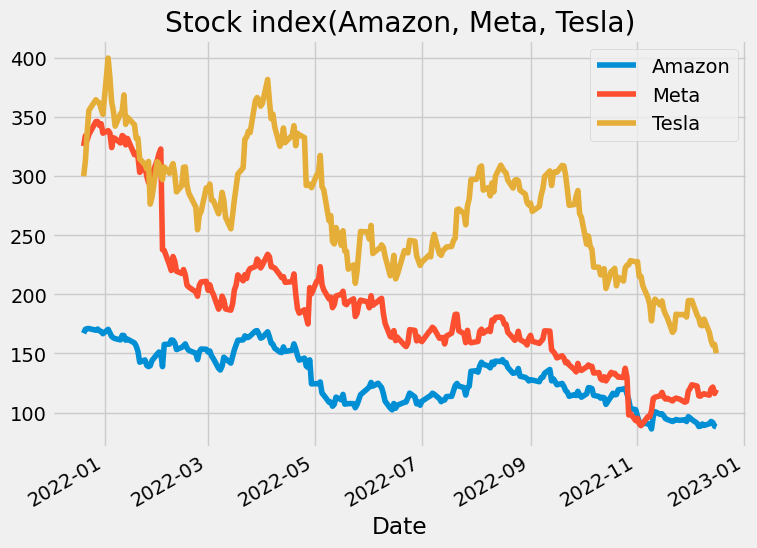

In [15]:
# Visualize the stock_data
stock_data.plot(figsize=(8,6), title='Stock index(Amazon, Meta, Tesla)')

# Summarize the stock_data
stock_data.describe()

From 2022 to 2023 these three stock price has a trend in decreasing.

,S&P 500
count,251.000000
mean,4130.661873
std,309.869312
min,3577.030000
25%,3900.825000
50%,4088.850000
75%,4389.115000
max,4796.560000


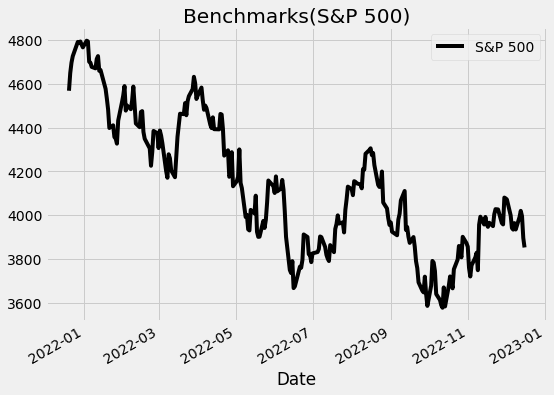

In [105]:
# Visualize the benchmark_data
benchmark_data.plot(title='Benchmarks(S&P 500)', figsize = (8,6), color='black')

# Summarize the benchmark_data
benchmark_data.describe()

write down what you observed...

## The Sharpe Ratio
Introduce Sharpe Ratio
What it is
Formula
Return v.s. investment

### Daily Stock Returns

,Amazon,Meta,Tesla
count,250.000000,250.000000,250.000000
mean,0.003067,0.004946,0.003619
std,0.031534,0.044994,0.041461
min,-0.119221,-0.149614,-0.119188
25%,-0.015584,-0.016098,-0.020292
50%,0.002936,0.002127,0.000522
75%,0.019975,0.021977,0.026834
max,0.163460,0.358513,0.138746


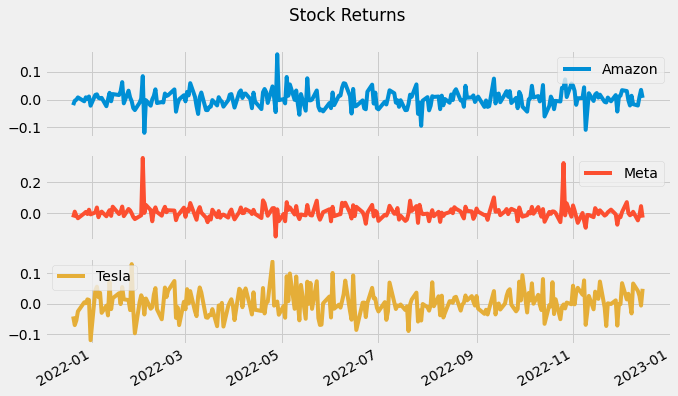

In [111]:
# Calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# Plot the daily returns
stock_returns.plot(subplots=True,title='Stock Returns', xlabel='', figsize=(10,6))

# Summarize the daily returns
stock_returns.describe()

Write down what you observed...

,S&P 500
count,250.000000
mean,0.000797
std,0.015250
min,-0.052523
25%,-0.009440
50%,0.001373
75%,0.009693
max,0.045190


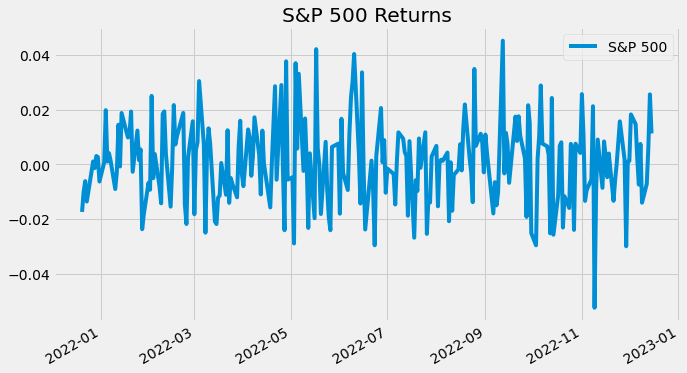

In [112]:
# Calculate daily benchmark_data returns
sp_returns = benchmark_data.pct_change()

# Plot the daily returns
sp_returns.plot(title='S&P 500 Returns', xlabel='', figsize=(10,6))

# Summarize the daily returns
sp_returns.describe()

Write down what you observed...

### Excess Returns
Relative performance of stocks vs. the S&P 500 benchmarks

,Amazon,Meta,Tesla
count,250.000000,250.000000,250.000000
mean,0.002269,0.004149,0.002821
std,0.021568,0.037860,0.033576
min,-0.114091,-0.125464,-0.112855
25%,-0.009355,-0.011354,-0.016584
50%,0.002875,0.001386,-0.000247
75%,0.013317,0.014872,0.020662
max,0.125809,0.333512,0.125223


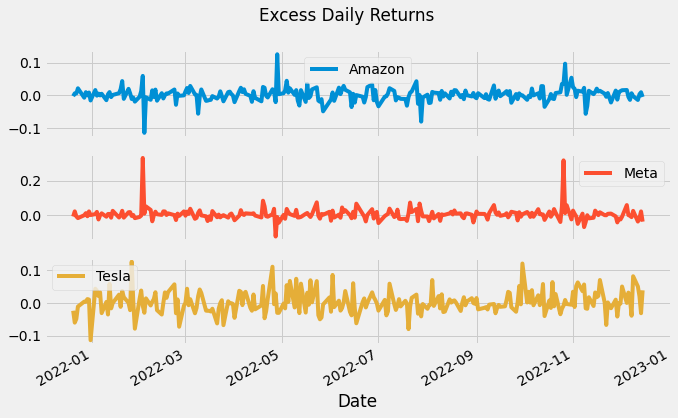

In [128]:
# Calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns['S&P 500'], axis=0)

# Plot the excess_returns
excess_returns.plot(subplots=True, title = 'Excess Daily Returns', figsize = (10,6))

# Summarize the excess_returns
excess_returns.describe()

### Average difference in daily returns and S&P 500

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

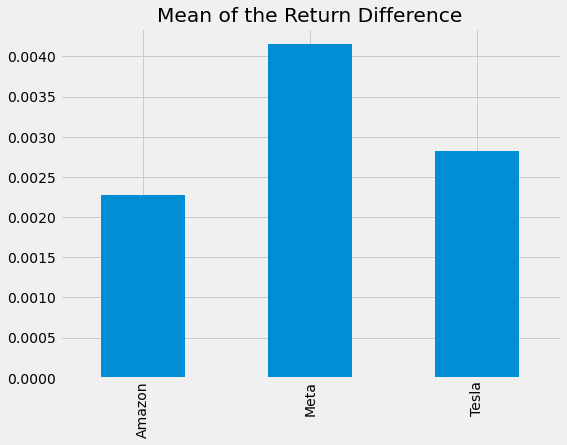

In [137]:
# Calculate average difference
avg_excess_return = excess_returns.mean()

# Plot average difference
avg_excess_return.plot.bar(title = 'Mean of the Return Difference', figsize = (8,6))

### Standard Deviation of the Return Difference
This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

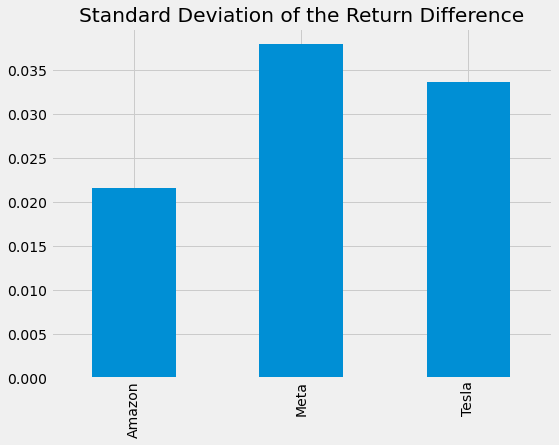

In [138]:
# Calculate standard deviation
sd_excess_return = excess_returns.std()

# Plot the standard deviation
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference', figsize = (8,6))

### Daily Sharpe Ratio
The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.
The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods.($\sqrt(245)$)

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

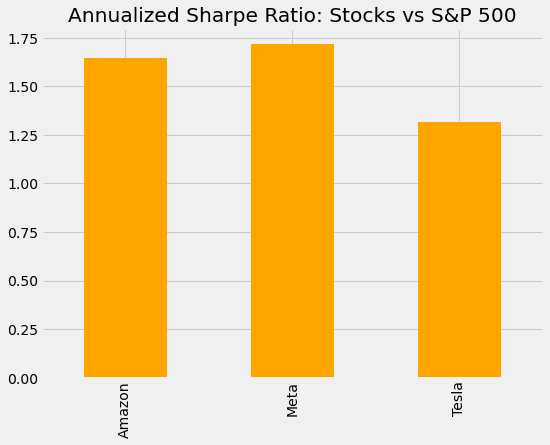

In [141]:
# Calculate the daily sharpe ration
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# Annualize the Sharpe Ratio
annual_factor = np.sqrt(245)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# Plot the annualized the sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500', figsize=(8,6),color='Orange')

Write down what you observed...

## Conclusion